In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import random
from scipy import integrate


In [2]:
torch.manual_seed(12)

d=300
n=1000
ntest=700
lbd=0.0001 # can try values 0.0001, 0.00001, 0.000001, all have multiple descent. More obvious when lambda is smaller

tau=0.1
F1=1



# P12=[5,30,50,70,100,120,140,170,190,215,235,250,270,300,320,350,380,400,420,450,475,480,490,510, 520 ,530,550,600,650,700,750,800,850,900,950,975,1000,1025,1050,1100,1200,1300,1400,1500,1600,1800,2000,2100,2200]
# P12=[5,60,100,150,160,180,200,210,220,230,290,300,350,400,450,475,480,485,490,495,505,510, 515, 520 ,525,550,600,650,700,750,800,850,900,950,975,1000,1025,1050,1100,1200,1300,1400,1500,1600]
# P12=[5,30,50,70,100,120,140,170,190,215,235,250,270,300,320,350,380,400,420,450,475,480,490,510, 520 ,530,550,600,650,700,750,800,850,900,950,975,1000,1025,1050,1100,1200,1300,1400,1500,1600]
P12=[5,30,50,70,100,120,140,170,190,215,235,250,270,300,320,350,380,400,420,450,475,480,490,510, 520 ,530,550,600,650,700,750,800,850,900,950,975,1000,1025,1050,1100,1200,1300,1400,1500,1600,1800,2000,2100,2200]
# P12=[30,50,70,100,120,140,170,190,215,235,250,270,300,320,350,380,400,420,450,475,480,490,510, 520 ,530,550,600,650,700,750,800,850,900,950,975,1000,1025,1050,1100,1200,1300,1400,1500,1600,1800,2000,2100,2200]

# P12=[215,235,250,270,300,320,350,380,400,420] #,450,475,480,490,510, 520 ,530,550,600,650,700,750,800,850,900,950,975,1000]
# P12=[100,150]

num_repeat = 30

In [3]:
def activation1(WX):
    # return torch.relu(WX)-1/math.sqrt(2*math.pi)
    return torch.relu(WX*80)
    # m=torch.nn.ELU(1)
    # return m(3*WX)
    # return torch.where(WX>0,1,0)

def activation2(WX):
    # return torch.relu(WX*0.1)
    # return torch.where(WX>0,1,0)
    return torch.relu(WX*9)
    # return 
def activation3(WX):
    # return torch.relu(WX)-1/math.sqrt(2*math.pi)
    # return torch.sin(WX*math.pi/2)
    
    return torch.relu(WX*1)

def activation4(WX):
    # return torch.relu(WX)-1/math.sqrt(2*math.pi)
    return torch.relu(WX*0.1)
    # m=torch.nn.ELU(1)
    # return m(3*WX)
    # return torch.where(WX>0,1,0)
# def activation4(WX):
#     # return torch.relu(WX)-1/math.sqrt(2*math.pi)
#     return torch.relu(WX*0.1)
#     # m=torch.nn.ELU(1)
#     # return m(3*WX)
#     # return torch.where(WX>0,1,0)

In [4]:

def mixed_simulation_decomposition(n,d,ntest,P1,P2,P3,P4,lbd,tau):
    P1=int(np.round(P1))
    P2=int(np.round(P2))
    P3=int(np.round(P3))
    P4=int(np.round(P4))
    # P4=int(np.round(P4))
    P = P1 + P2+P3+P4
    X = torch.randn(size=(n,d)).cuda()
    Xnorms = (torch.sum(torch.abs(X)**2, axis=-1 ) )**(1./2)
    X = X / Xnorms[:,None] * ( d**(1./2) )

    beta = torch.randn(size=(d,1)).cuda()
    beta = beta / (torch.sum(torch.abs(beta)**2 ) )**(1./2)*F1
    beta0=torch.ones(n,1).cuda()*0.2
    beta0_test=torch.ones(ntest,1).cuda()*0.2

    noise = torch.randn(size=(n,1)).cuda() * tau
    Y = torch.matmul( X, beta ) +beta0+ noise

    Xtest = torch.randn(size=(ntest,d)).cuda()
    Xtestnorms = (torch.sum(torch.abs(Xtest)**2, axis=-1 ) )**(1./2)
    Xtest = Xtest / Xtestnorms[:,None] * ( d**(1./2) )

    noisetest = torch.randn(size=(ntest,1)).cuda() * tau
    Ytest = torch.matmul( Xtest, beta )+beta0_test #+ noisetest





    W1 = torch.randn(size=(P1,d)).cuda()
    W1norms = (torch.sum(torch.abs(W1)**2, axis=-1 ) )**(1./2)
    W1 = (W1 / W1norms[:,None]).T * ( d**(1./2) )
   
    W2 = torch.randn(size=(P2,d)).cuda()
    W2norms = (torch.sum(torch.abs(W2)**2, axis=-1 ) )**(1./2)
    W2 = (W2 / W2norms[:,None]).T * ( d**(1./2) )

    W3 = torch.randn(size=(P3,d)).cuda()
    W3norms = (torch.sum(torch.abs(W3)**2, axis=-1 ) )**(1./2)
    W3 = (W3 / W3norms[:,None]).T * ( d**(1./2) )

    W4 = torch.randn(size=(P4,d)).cuda()
    W4norms = (torch.sum(torch.abs(W4)**2, axis=-1 ) )**(1./2)
    W4 = (W4 / W4norms[:,None]).T * ( d**(1./2) )

    # W=torch.cat((W1.T,W2.T,W3.T)).T

    Z = torch.cat( (activation1( torch.matmul( X, W1 ) * ( d**(-0.5) ) ), activation2( torch.matmul( X, W2 ) * ( d**(-0.5) ) ),activation3( torch.matmul( X, W3 ) * ( d**(-0.5) ) ),activation4( torch.matmul( X, W4 ) * ( d**(-0.5) ) ) ) , 1) * ( d**(-0.5) )
    Ztest = torch.cat( (activation1( torch.matmul( Xtest, W1 ) * ( d**(-0.5) ) ), activation2( torch.matmul( Xtest, W2 ) * ( d**(-0.5) ) ),activation3( torch.matmul( Xtest, W3 ) * ( d**(-0.5) ) ),activation4( torch.matmul( Xtest, W4 ) * ( d**(-0.5) ) ) ) , 1) * ( d**(-0.5) )
    
    if 2*n > P:
        SIGMA=torch.matmul( Z.T, Z ) + (lbd )* torch.eye(P).cuda()
        # InvSIGMA=torch.linalg.inv(SIGMA)
        # FF=torch.matmul(Z,InvSIGMA)
        a_hat = torch.linalg.lstsq( torch.matmul( Z.T, Z ) + (lbd )* torch.eye(P).cuda() , torch.matmul( Z.T, Y ) ).solution
        
    else: 
        SIGMA=torch.matmul( Z, Z.T ) + (lbd )* torch.eye(n).cuda()
        a_hat =  torch.matmul( Z.T, torch.linalg.lstsq( torch.matmul( Z,Z.T ) + (lbd)* torch.eye(n).cuda() , Y ).solution )
        # InvSIGMA=torch.linalg.inv(SIGMA)
        # FF=torch.matmul(InvSIGMA,Z)
    
  
    
    risk_train = torch.sum( (torch.matmul(Z, a_hat) - Y)**2 ) / n
    risk = torch.sum( (torch.matmul(Ztest, a_hat) - Ytest)**2 ) / ntest
    #return risk, risk_train,H1,H2,H3,H4
    return risk.cpu().numpy(), risk_train.cpu().numpy()

In [5]:
# risks = np.zeros(len(P12)*num_repeat)
# risks_train = np.zeros(len(P12)*num_repeat)
risks = np.zeros(len(P12))

for i in range(len(P12)):
    for rp in range(num_repeat):
        risk_temp , _ = mixed_simulation_decomposition(n,d,ntest,P12[i],P12[i],P12[i],3*P12[i],lbd,tau)
        risks[i] = risks[i] + risk_temp
    risks[i] = risks[i] / num_repeat

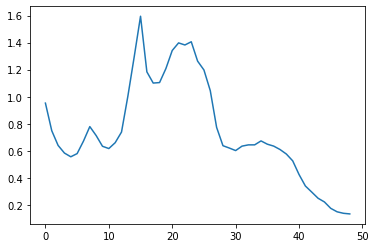

In [6]:
plt.plot(risks)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=np.array([risks])
# path0='0.2ReLU1|4ELU3lbd1e-5'
# path0='0.2ReLU0.1ReLUplbd1e-5'
# path0='0.2ReLUandSigmoid1e-5'
path0='test2'
# path="/content/drive/My Drive/Colab Notebooks/tripledescentsimus/bad/"+path0+".csv"
path="/content/drive/My Drive/multisimu/multiple/"+path0+".csv"
np.savetxt(path, data, delimiter=',')
